# MalagaHouse

*Trabajo Fin de Máster FP en IA y Big Data realizado por Miguel Gámez Ruiz y Sergio Toscano Díaz*

<img width="650" src="https://drive.google.com/uc?id=1bKCPieOVMbV5VJoofNT9oPxnWGLWNN-U">

## 1. Justificación y descripción del proyecto



### Justificación:
Hemos decidido hacer un proyecto en el que se pueda obtener el precio de las viviendas en Málaga de una forma rápida. Pensamos que puede ser útil para quiénes buscan un lugar para vivir aquí en Málaga. De esta manera, el cliente podrá ver qué presupuesto necesitará para comprar o vender según el tipo de vivienda que esté buscando o vendiendo. Usamos datos reales para que el cliente tenga una estimación más acertada del precio.

### Descripción:
El proyecto de Machine Learning constará de lo siguiente:

- Un modelo entrenado que haga la predicción de las viviendas en Málaga.
- Una aplicación web en la que, en base a los parámetros que se pidan, se obtendrá el precio estimado de las viviendas.
- Enlaces a los recursos utilizados.
- Una presentación PDF y un vídeo explicativo del proyecto.



## 2. Obtención de datos

[Scrapping MalagaHouse](https://colab.research.google.com/drive/1A0mQj0kTm9H20nlD19nb37SNhqs26OX7#scrollTo=_dR2wiHFtlGC)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#file_path = '/content/drive/MyDrive/datasets/MalagaHouse/housingzonas.csv'
#houses = pd.read_csv(file_path)

file_path = '/content/drive/MyDrive/housing (2).csv'
houses = pd.read_csv(file_path)

## 3. Descripción de los datos

En el dataset que hemos generado tenemos los siguientes campos:

- Ciudad: Nombre de la ciudad en la que se encuentra la vivienda.
- Precio: Precio de la vivienda.
- Superficie: Los metros cuadrados que ocupa la superficie de la vivienda.
- Habitaciones: Número de habitaciones que tiene la vivienda.
- Baños: Número de baños que tiene la vivienda.
- Garaje: Si tiene garaje o no. 1 si tiene y 0 si no tiene.
- Trastero: Si tiene garaje o no.  1 si tiene y 0 si no tiene.
- Ascensor: Si tiene ascensor o no. 1 si tiene y 0 si no tiene.
- Terraza: Si tiene terraza o no. 1 si tiene y 0 si no tiene.
- Amueblado: Si tiene amueblado o no. 1 si tiene y 0 si no tiene.
- Chimenea: Si tiene chimenea o no. 1 si tiene y 0 si no tiene.
- Piscina: Si tiene piscina o no. 1 si tiene y 0 si no tiene.
- Jardín: Si tiene jardín o no. 1 si tiene y 0 si no tiene.
- Descripción: Descripción de la vivienda según el vendedor.

## 4. Exploración y visualización de los datos

In [ ]:
houses

,Tipo,Zona,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín,Descripción
0,Piso,Bailén-Miraflores,115000,69,2,1,0,0,0,0,1,0,0,0,"Se vende piso en calle churruca, muy bien situ..."
1,Piso,Centro,295000,70,2,1,0,1,1,0,0,0,0,0,Vivienda en venta en Málaga zona Centro histó...
2,Ático,Este,477000,170,6,2,0,1,0,1,0,0,0,0,"""tlf/ whatsapp (+34) 670,671,098. Encantadora ..."
3,Dúplex,Centro,1950000,190,3,3,1,1,1,1,0,0,0,0,ÚNICO - INMEJORABLE LOCALIZACION - EXCLUSIVO -...
4,Casa,Ciudad Jardín,126000,90,3,1,0,0,0,1,0,0,0,0,Casa mata en venta en Ciudad Jardín situada en...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Piso,Bailén-Miraflores,160000,72,2,1,0,0,1,0,1,0,0,0,Excelente vivienda de dos dormitorios en la cu...
2186,Piso,Centro,182000,112,4,1,0,0,1,0,0,0,0,0,Vivienda ubicada en Málaga.Piso exterior de 21...
2187,Casa,Churriana,320000,160,4,2,1,1,0,1,1,1,1,0,Preciosa vivienda en la mejor zona de Churrian...
2188,Piso,Teatinos-Universidad,340000,155,3,2,1,1,1,1,0,0,1,0,"Todo exterior, en uno de los mejores recintos ..."


In [ ]:
houses.head()

,Tipo,Zona,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín,Descripción
0,Piso,Bailén-Miraflores,115000,69,2,1,0,0,0,0,1,0,0,0,"Se vende piso en calle churruca, muy bien situ..."
1,Piso,Centro,295000,70,2,1,0,1,1,0,0,0,0,0,Vivienda en venta en Málaga zona Centro histó...
2,Ático,Este,477000,170,6,2,0,1,0,1,0,0,0,0,"""tlf/ whatsapp (+34) 670,671,098. Encantadora ..."
3,Dúplex,Centro,1950000,190,3,3,1,1,1,1,0,0,0,0,ÚNICO - INMEJORABLE LOCALIZACION - EXCLUSIVO -...
4,Casa,Ciudad Jardín,126000,90,3,1,0,0,0,1,0,0,0,0,Casa mata en venta en Ciudad Jardín situada en...


In [ ]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          2103 non-null   object
 1   Zona          2190 non-null   object
 2   Precio        2190 non-null   object
 3   Superficie    2190 non-null   int64 
 4   Habitaciones  2190 non-null   int64 
 5   Baños         2190 non-null   int64 
 6   Garaje        2190 non-null   int64 
 7   Trastero      2190 non-null   int64 
 8   Ascensor      2190 non-null   int64 
 9   Terraza       2190 non-null   int64 
 10  Amueblado     2190 non-null   int64 
 11  Chimenea      2190 non-null   int64 
 12  Piscina       2190 non-null   int64 
 13  Jardín        2190 non-null   int64 
 14  Descripción   2190 non-null   object
dtypes: int64(11), object(4)
memory usage: 256.8+ KB


¿Cuáles son los valores que contiene `Zona`?



In [ ]:
houses['Zona'].unique()

array(['Bailén-Miraflores', 'Centro', 'Este', 'Ciudad Jardín',
       'Carretera de Cádiz', 'Teatinos-Universidad', 'Churriana',
       'La Rosaleda-La Roca', 'Cruz de Humilladero', 'Campanillas',
       'Puerto de la Torre'], dtype=object)

¿Cuántas casas hay en cada ciudad en este dataset?

In [ ]:
houses['Zona'].value_counts()

Centro                  501
Este                    331
Carretera de Cádiz      289
Bailén-Miraflores       223
Cruz de Humilladero     195
Puerto de la Torre      147
Ciudad Jardín           124
Churriana               117
Teatinos-Universidad    102
La Rosaleda-La Roca      95
Campanillas              66
Name: Zona, dtype: int64

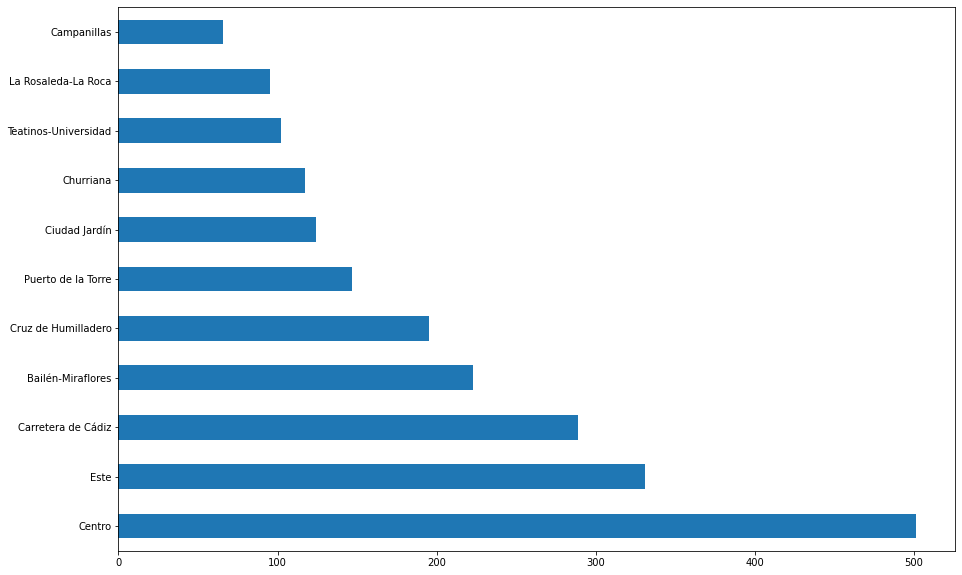

In [ ]:
houses['Zona'].value_counts().plot(kind="barh", figsize = (15, 10))
plt.show()

In [ ]:
#houses[['Zona','Precio']].sort_values(by="Ciudad",ascending=False)[:10].plot(kind='bar',x='Ciudad',y='Precio',cmap='Set2')
#plt.show()

In [ ]:
#sns.jointplot(x='Precio',y='Superficie',data=centro)
#plt.show()

In [ ]:
#centro[['Precio','Superficie']].sort_values(by='Precio',ascending=False)[:5].plot(kind='bar',x='Precio',y="Superficie",cmap='plasma')
#plt.title("",fontsize=15)
#plt.show()

¿Se repiten algunos precios?

In [ ]:
houses['Precio'].value_counts()

350000    30
295000    22
450000    22
270000    21
240000    20
          ..
267000     1
168500     1
890900     1
673000     1
261387     1
Name: Precio, Length: 701, dtype: int64

Observamos que hay cuatro campos en los que el precio no es un dato numérico, por lo que decidimos eliminarlos.

In [ ]:
houses[houses["Precio"] == "A consultar"]

,Tipo,Zona,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín,Descripción
67,Piso,Cruz de Humilladero,A consultar,87,3,1,0,0,0,0,1,0,0,0,"Piso en málaga capital, en la calle malaga-rio..."
567,Piso,Puerto de la Torre,A consultar,103,3,2,1,1,1,1,0,0,0,0,Piso en un edificio de obra nueva de 103 m2 de...
585,Piso,Puerto de la Torre,A consultar,90,2,2,1,0,0,1,0,0,1,0,"Edificio de 14 viviendas, 24 aparcamientos, tr..."
727,Piso,Puerto de la Torre,A consultar,95,2,2,1,1,1,1,0,0,0,0,Piso en una finca de obra nueva de 95 m2 de su...
1269,Chalet,Puerto de la Torre,A consultar,532,3,3,0,0,0,0,0,0,0,0,Próxima construcción de chalet independiente. ...
1608,Piso,Puerto de la Torre,A consultar,203,3,3,1,1,0,1,0,1,1,1,Chalet pareado ubicado en la avenida principal...
1697,Piso,Puerto de la Torre,A consultar,71,1,1,1,1,1,1,0,0,0,0,Piso en un edificio de obra nueva de 71 m2 de ...
1839,Chalet,Carretera de Cádiz,A consultar,73,2,1,1,0,0,0,0,0,0,0,********promoción santa cristina ******** list...
1880,Piso,La Rosaleda-La Roca,A consultar,84,2,2,0,0,0,0,1,0,0,0,"Piso en málaga capital, en la calle calle ebro..."


In [ ]:
houses.drop(houses[(houses['Precio'] == 'A consultar')].index, inplace=True)

In [ ]:
houses['Precio'] = houses['Precio'].astype('int')

In [ ]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2181 entries, 0 to 2189
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          2094 non-null   object
 1   Zona          2181 non-null   object
 2   Precio        2181 non-null   int64 
 3   Superficie    2181 non-null   int64 
 4   Habitaciones  2181 non-null   int64 
 5   Baños         2181 non-null   int64 
 6   Garaje        2181 non-null   int64 
 7   Trastero      2181 non-null   int64 
 8   Ascensor      2181 non-null   int64 
 9   Terraza       2181 non-null   int64 
 10  Amueblado     2181 non-null   int64 
 11  Chimenea      2181 non-null   int64 
 12  Piscina       2181 non-null   int64 
 13  Jardín        2181 non-null   int64 
 14  Descripción   2181 non-null   object
dtypes: int64(12), object(3)
memory usage: 272.6+ KB


Media, máximo, mínimo, percentiles, etc.

In [ ]:
houses.describe()

,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín
count,2.181000e+03,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.00000
mean,4.326082e+05,147.602476,3.281064,1.979367,0.421366,0.295277,0.532783,0.628152,0.226502,0.084823,0.213205,0.13801
std,4.694162e+05,111.185761,1.323172,1.096716,0.493891,0.456272,0.499039,0.483409,0.418663,0.278683,0.409665,0.34499
min,3.383000e+04,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.856000e+05,82.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2.950000e+05,113.000000,3.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000
75%,4.950000e+05,170.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000
max,7.500000e+06,991.000000,12.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


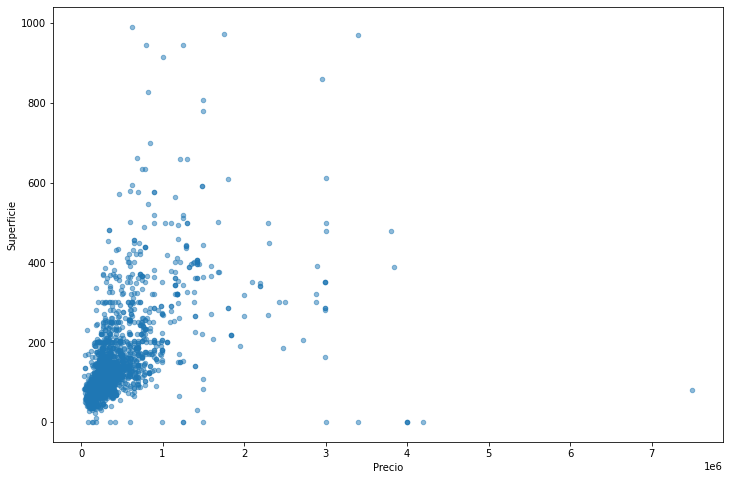

In [ ]:
houses.plot(kind="scatter", x = "Precio", y = "Superficie", figsize = (12, 8), alpha = 0.5)
plt.show()

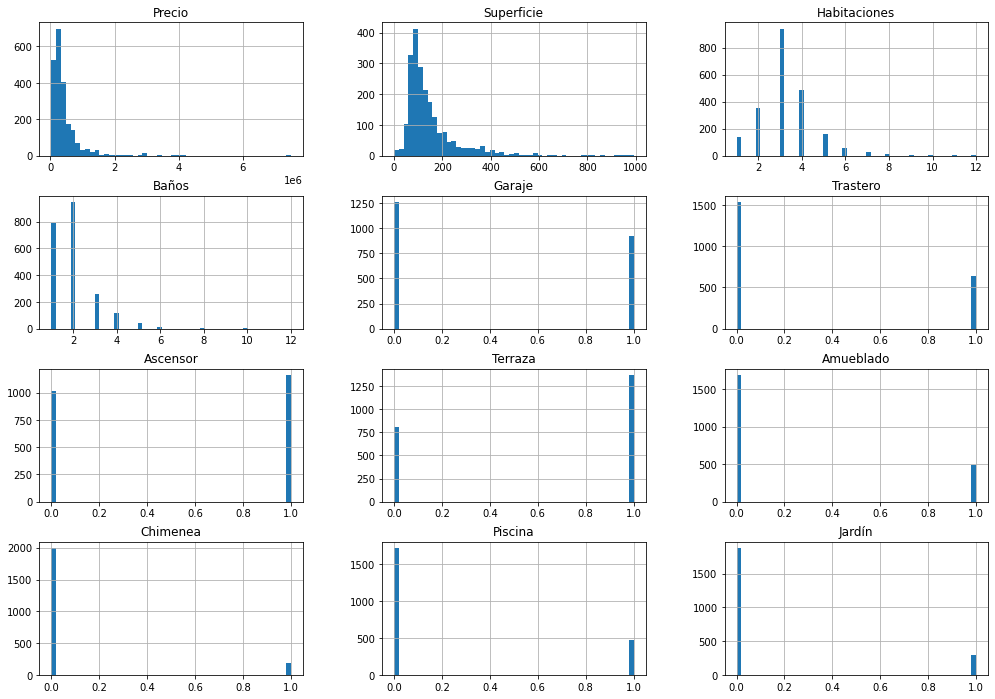

In [ ]:
houses.hist(bins=50, figsize=(17, 12))
plt.show()

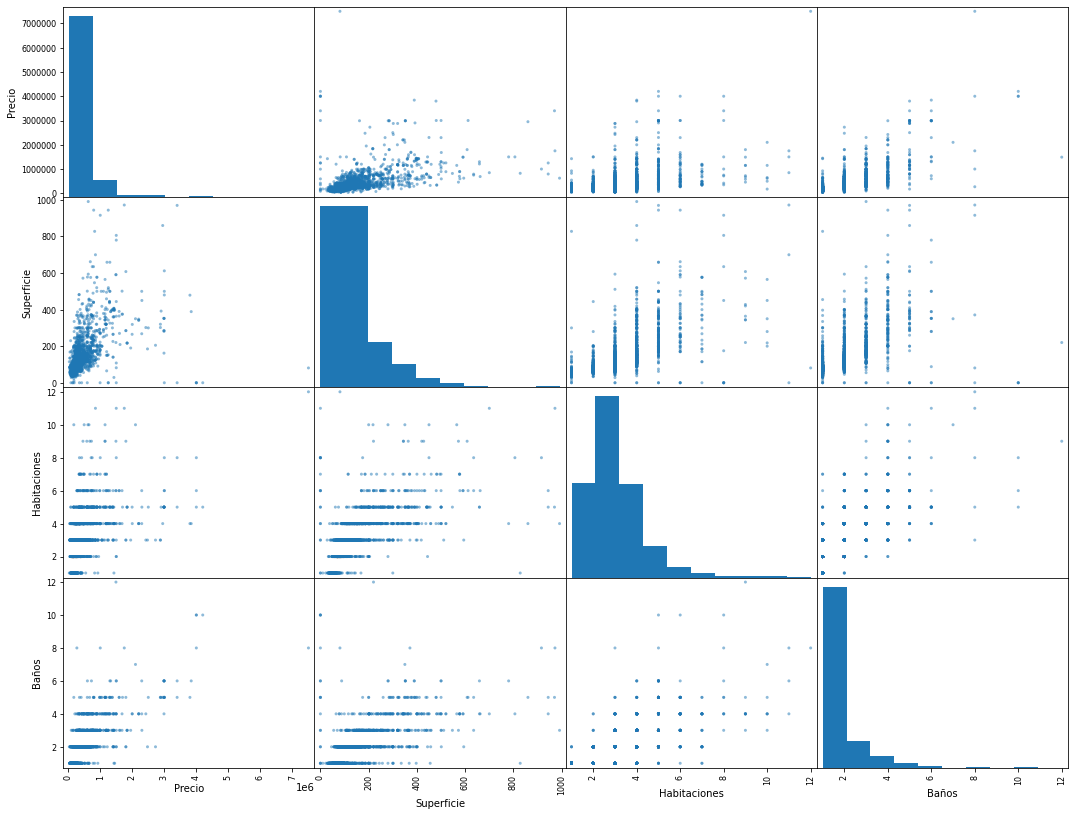

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Precio", "Superficie", "Habitaciones", "Baños"]
scatter_matrix(houses[attributes], figsize=(18,14))
plt.show()

## 5. Limpieza de datos y Preparación de los datos para los algoritmos de Machine Learning

### Gestión de nulos

La mayoría de algoritmos de ML no trabajan bien cuando faltan datos. 

In [ ]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2181 entries, 0 to 2189
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          2094 non-null   object
 1   Zona          2181 non-null   object
 2   Precio        2181 non-null   int64 
 3   Superficie    2181 non-null   int64 
 4   Habitaciones  2181 non-null   int64 
 5   Baños         2181 non-null   int64 
 6   Garaje        2181 non-null   int64 
 7   Trastero      2181 non-null   int64 
 8   Ascensor      2181 non-null   int64 
 9   Terraza       2181 non-null   int64 
 10  Amueblado     2181 non-null   int64 
 11  Chimenea      2181 non-null   int64 
 12  Piscina       2181 non-null   int64 
 13  Jardín        2181 non-null   int64 
 14  Descripción   2181 non-null   object
dtypes: int64(12), object(3)
memory usage: 272.6+ KB


In [ ]:
incomplete_rows = houses[houses.isnull().any(axis=1)]
incomplete_rows

,Tipo,Zona,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín,Descripción
33,NaN,Centro,240000,175,2,1,0,0,1,0,1,0,0,0,Apartamento de dos dormitorios (uno exterior y...
66,NaN,La Rosaleda-La Roca,295000,40,1,1,1,0,1,0,0,0,1,1,Este proyecto único está ubicado en el borde d...
70,NaN,Centro,499000,115,7,1,0,0,0,1,0,0,0,0,"¿Está buscando un piso amplio, cómodo y solead..."
73,NaN,Centro,289000,65,2,1,0,0,1,0,0,0,0,0,¿Está buscando una gran oportunidad de inversi...
129,NaN,Centro,750000,164,3,3,1,0,0,0,1,0,0,0,Este apartamento totalmente reformado se encue...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,NaN,Centro,519900,154,4,2,0,0,0,0,1,0,0,0,Te gustaria vivir en pleno Casco Historico de ...
2054,NaN,Centro,190000,69,1,1,0,0,0,0,1,0,0,0,REDPISO VENDE EN EXCLUSIVA magnífico apartamen...
2092,NaN,Centro,295000,72,1,1,0,0,1,1,0,0,0,0,¿Está buscando un dúplex amplio y cómodo para ...
2099,NaN,Carretera de Cádiz,1618000,209,4,3,1,1,0,0,0,0,1,0,¿Quiere ser dueño de una propiedad en lo que e...


In [ ]:
incomplete_rows.dropna(axis=0, inplace=True)


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
incomplete_rows

,Tipo,Zona,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín,Descripción


Observamos que no hay valores nulos.

### Conversión de categorías a números

La mayoría de algoritmos de ML trabajan mejor con números que con categorías.

In [ ]:
houses['Zona'] 

0          Bailén-Miraflores
1                     Centro
2                       Este
3                     Centro
4              Ciudad Jardín
                ...         
2185       Bailén-Miraflores
2186                  Centro
2187               Churriana
2188    Teatinos-Universidad
2189     La Rosaleda-La Roca
Name: Zona, Length: 2181, dtype: object

In [ ]:
houses["Zona"].unique()

array(['Bailén-Miraflores', 'Centro', 'Este', 'Ciudad Jardín',
       'Carretera de Cádiz', 'Teatinos-Universidad', 'Churriana',
       'La Rosaleda-La Roca', 'Cruz de Humilladero', 'Campanillas',
       'Puerto de la Torre'], dtype=object)

In [ ]:
houses_zona = houses["Zona"].unique()

In [ ]:
zona_num = np.arange(len(houses["Zona"].unique()))
zona_num

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
houses["Zona"].replace(houses_zona, zona_num, inplace=True)
houses

,Tipo,Zona,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín,Descripción
0,Piso,0,115000,69,2,1,0,0,0,0,1,0,0,0,"Se vende piso en calle churruca, muy bien situ..."
1,Piso,1,295000,70,2,1,0,1,1,0,0,0,0,0,Vivienda en venta en Málaga zona Centro histó...
2,Ático,2,477000,170,6,2,0,1,0,1,0,0,0,0,"""tlf/ whatsapp (+34) 670,671,098. Encantadora ..."
3,Dúplex,1,1950000,190,3,3,1,1,1,1,0,0,0,0,ÚNICO - INMEJORABLE LOCALIZACION - EXCLUSIVO -...
4,Casa,3,126000,90,3,1,0,0,0,1,0,0,0,0,Casa mata en venta en Ciudad Jardín situada en...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Piso,0,160000,72,2,1,0,0,1,0,1,0,0,0,Excelente vivienda de dos dormitorios en la cu...
2186,Piso,1,182000,112,4,1,0,0,1,0,0,0,0,0,Vivienda ubicada en Málaga.Piso exterior de 21...
2187,Casa,6,320000,160,4,2,1,1,0,1,1,1,1,0,Preciosa vivienda en la mejor zona de Churrian...
2188,Piso,5,340000,155,3,2,1,1,1,1,0,0,1,0,"Todo exterior, en uno de los mejores recintos ..."


In [ ]:
houses['Tipo'] 

0         Piso
1         Piso
2        Ático
3       Dúplex
4         Casa
         ...  
2185      Piso
2186      Piso
2187      Casa
2188      Piso
2189      Casa
Name: Tipo, Length: 2181, dtype: object

In [ ]:
houses["Tipo"].unique()

array(['Piso', 'Ático', 'Dúplex', 'Casa', 'Chalet', nan, 'Finca rústica',
       'Estudio', 'Loft'], dtype=object)

In [ ]:
houses_tipo = houses["Tipo"].unique()

In [ ]:
tipo_num = np.arange(len(houses["Tipo"].unique()))
tipo_num

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
houses["Tipo"].replace(houses_tipo, tipo_num, inplace=True)
houses

,Tipo,Zona,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín,Descripción
0,0,0,115000,69,2,1,0,0,0,0,1,0,0,0,"Se vende piso en calle churruca, muy bien situ..."
1,0,1,295000,70,2,1,0,1,1,0,0,0,0,0,Vivienda en venta en Málaga zona Centro histó...
2,1,2,477000,170,6,2,0,1,0,1,0,0,0,0,"""tlf/ whatsapp (+34) 670,671,098. Encantadora ..."
3,2,1,1950000,190,3,3,1,1,1,1,0,0,0,0,ÚNICO - INMEJORABLE LOCALIZACION - EXCLUSIVO -...
4,3,3,126000,90,3,1,0,0,0,1,0,0,0,0,Casa mata en venta en Ciudad Jardín situada en...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,0,0,160000,72,2,1,0,0,1,0,1,0,0,0,Excelente vivienda de dos dormitorios en la cu...
2186,0,1,182000,112,4,1,0,0,1,0,0,0,0,0,Vivienda ubicada en Málaga.Piso exterior de 21...
2187,3,6,320000,160,4,2,1,1,0,1,1,1,1,0,Preciosa vivienda en la mejor zona de Churrian...
2188,0,5,340000,155,3,2,1,1,1,1,0,0,1,0,"Todo exterior, en uno de los mejores recintos ..."


### Eliminación de columnas

In [ ]:
houses.drop(columns='Descripción', inplace=True)
houses

,Tipo,Zona,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín
0,0,0,115000,69,2,1,0,0,0,0,1,0,0,0
1,0,1,295000,70,2,1,0,1,1,0,0,0,0,0
2,1,2,477000,170,6,2,0,1,0,1,0,0,0,0
3,2,1,1950000,190,3,3,1,1,1,1,0,0,0,0
4,3,3,126000,90,3,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,0,0,160000,72,2,1,0,0,1,0,1,0,0,0
2186,0,1,182000,112,4,1,0,0,1,0,0,0,0,0
2187,3,6,320000,160,4,2,1,1,0,1,1,1,1,0
2188,0,5,340000,155,3,2,1,1,1,1,0,0,1,0


In [ ]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2181 entries, 0 to 2189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Tipo          2181 non-null   int64
 1   Zona          2181 non-null   int64
 2   Precio        2181 non-null   int64
 3   Superficie    2181 non-null   int64
 4   Habitaciones  2181 non-null   int64
 5   Baños         2181 non-null   int64
 6   Garaje        2181 non-null   int64
 7   Trastero      2181 non-null   int64
 8   Ascensor      2181 non-null   int64
 9   Terraza       2181 non-null   int64
 10  Amueblado     2181 non-null   int64
 11  Chimenea      2181 non-null   int64
 12  Piscina       2181 non-null   int64
 13  Jardín        2181 non-null   int64
dtypes: int64(14)
memory usage: 255.6 KB


In [ ]:
corr_matrix = houses.corr()
corr_matrix

,Tipo,Zona,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín
Tipo,1.000000,0.122539,0.281014,0.454710,0.305842,0.369347,0.093200,-0.020996,-0.538980,0.070217,0.017498,0.347944,0.211811,0.162387
Zona,0.122539,1.000000,-0.132393,0.082323,0.102710,0.051486,0.180515,0.141422,-0.172677,0.071864,0.042555,0.127883,0.113018,0.022633
Precio,0.281014,-0.132393,1.000000,0.505039,0.454323,0.711930,0.281392,0.153878,-0.124799,0.226118,-0.030022,0.259915,0.356375,0.281908
Superficie,0.454710,0.082323,0.505039,1.000000,0.605078,0.606996,0.253754,0.151329,-0.332129,0.264115,-0.026731,0.412941,0.360061,0.275312
Habitaciones,0.305842,0.102710,0.454323,0.605078,1.000000,0.621986,0.176678,0.079016,-0.224105,0.301881,-0.010637,0.319710,0.249056,0.199371
Baños,0.369347,0.051486,0.711930,0.606996,0.621986,1.000000,0.337023,0.203770,-0.233861,0.294411,-0.042766,0.353928,0.421254,0.322752
Garaje,0.093200,0.180515,0.281392,0.253754,0.176678,0.337023,1.000000,0.398241,0.026749,0.329943,-0.013654,0.203455,0.385565,0.358516
Trastero,-0.020996,0.141422,0.153878,0.151329,0.079016,0.203770,0.398241,1.000000,0.046109,0.277580,-0.102939,0.116789,0.291291,0.148976
Ascensor,-0.538980,-0.172677,-0.124799,-0.332129,-0.224105,-0.233861,0.026749,0.046109,1.000000,0.040097,0.008354,-0.265733,-0.026351,-0.072919
Terraza,0.070217,0.071864,0.226118,0.264115,0.301881,0.294411,0.329943,0.277580,0.040097,1.000000,-0.059626,0.189972,0.245320,0.225344


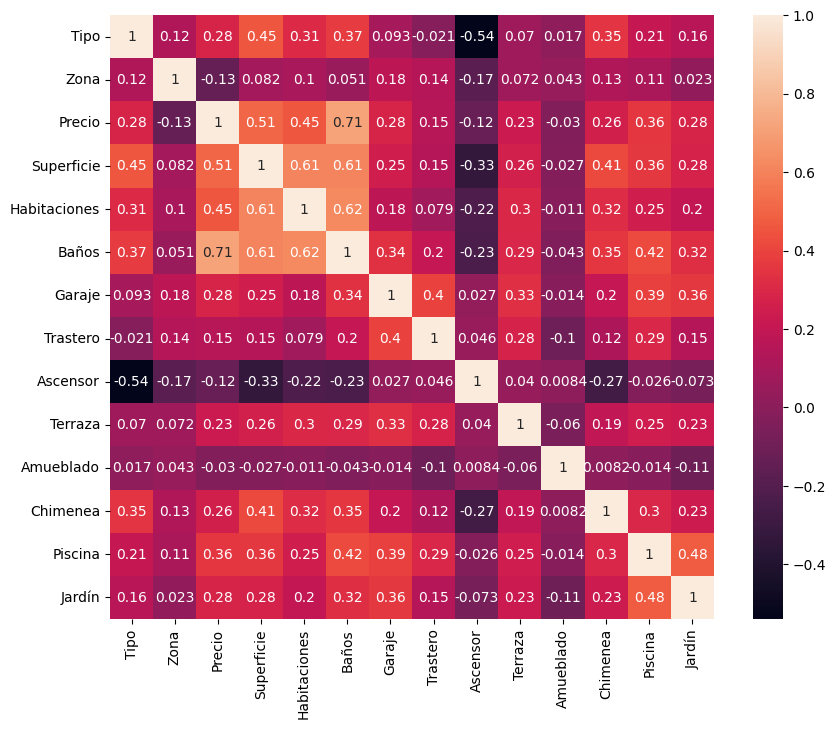

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
sns.heatmap(corr_matrix, annot=True, square=True, ax=ax)
plt.show()

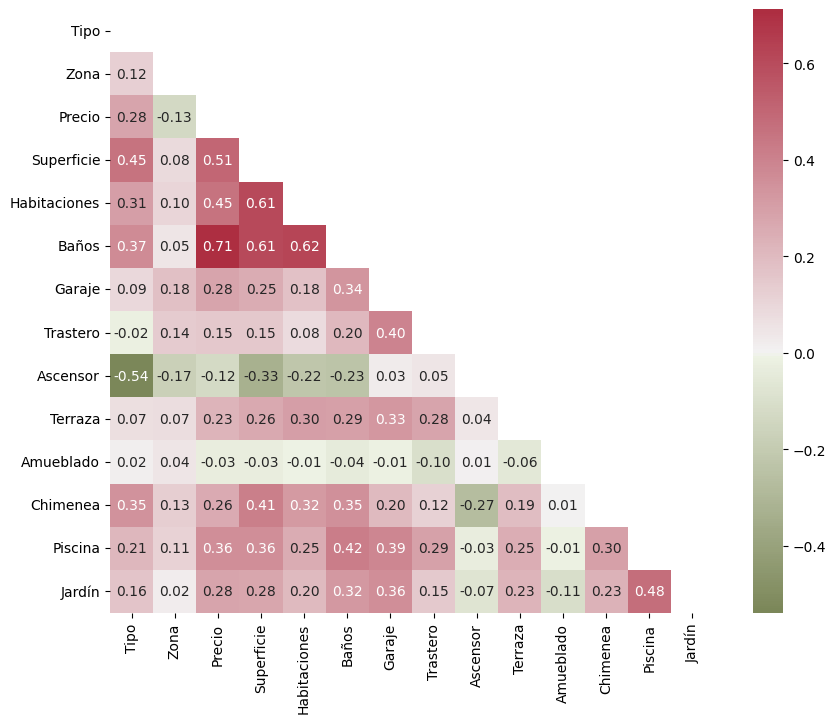

In [ ]:
my_mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
my_cmap = sns.diverging_palette(100, 7, s=75, l=40, n=5, center="light", as_cmap=True)
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)

sns.heatmap(corr_matrix, mask=my_mask, cmap=my_cmap, ax=ax, center=0, fmt='.2f', annot=True, square=True)
plt.show()

### Separación de la matriz de características $X$ de los datos de salida $y$ (el target)

In [ ]:
y = houses['Precio']
y

0        115000
1        295000
2        477000
3       1950000
4        126000
         ...   
2185     160000
2186     182000
2187     320000
2188     340000
2189     650000
Name: Precio, Length: 2181, dtype: int64

In [ ]:
X = houses.drop('Precio', axis=1)
X

,Tipo,Zona,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín
0,0,0,69,2,1,0,0,0,0,1,0,0,0
1,0,1,70,2,1,0,1,1,0,0,0,0,0
2,1,2,170,6,2,0,1,0,1,0,0,0,0
3,2,1,190,3,3,1,1,1,1,0,0,0,0
4,3,3,90,3,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,0,0,72,2,1,0,0,1,0,1,0,0,0
2186,0,1,112,4,1,0,0,1,0,0,0,0,0
2187,3,6,160,4,2,1,1,0,1,1,1,1,0
2188,0,5,155,3,2,1,1,1,1,0,0,1,0


### Creación de los datos de prueba

Separamos el dataset en dos partes:

* Datos de entrenamiento (training set) - 80%
* Datos de prueba (testing set) - 20% (Si tenemos muchos datos el porcentaje es menor)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [ ]:
X_train

,Tipo,Zona,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín
2023,0,5,120,3,2,0,0,1,1,0,0,1,0
24,0,4,78,3,1,0,0,1,0,0,0,0,0
44,0,6,170,3,2,0,0,0,0,0,0,0,0
201,3,0,211,4,3,1,0,0,1,0,1,0,0
205,3,4,96,2,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0,4,69,2,1,0,0,0,0,0,0,0,0
1595,0,1,153,3,2,1,0,1,1,0,0,0,0
547,2,8,150,3,1,1,0,1,0,0,0,0,0
1001,0,1,120,3,2,0,0,1,0,1,0,0,0


In [ ]:
X_test

,Tipo,Zona,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín
536,3,0,125,3,2,0,0,0,0,0,0,0,0
1021,0,1,114,3,2,0,0,1,0,0,0,0,0
860,3,6,410,5,4,1,0,0,1,0,1,1,0
1877,6,9,92,2,2,0,0,0,0,0,0,0,0
1189,0,8,74,3,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,0,5,148,3,2,1,1,1,1,0,0,1,0
1893,0,2,84,3,1,0,0,0,1,0,0,0,0
1379,0,4,130,4,2,0,1,1,1,0,0,1,1
1045,5,0,47,1,1,1,0,1,0,0,0,0,0


In [ ]:
y_train

2023    329000
24      178000
44      209900
201     337000
205     247000
         ...  
540     119500
1595    499000
547     245000
1001    479000
1591    165970
Name: Precio, Length: 1962, dtype: int64

In [ ]:
y_test

536     199500
1021    479000
860     570000
1877     75000
1189    165000
         ...  
1807    325000
1893    110000
1379    550000
1045    140000
115     519000
Name: Precio, Length: 219, dtype: int64

## 6. Entrenamiento del modelo y comprobación del rendimiento

### LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

houses_model = LinearRegression()

In [ ]:
# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

In [ ]:
print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
199500.00    494185.07        294685.07
479000.00    484287.73          5287.73
570000.00   1090401.01        520401.01
75000.00    253449.61        178449.61
165000.00      7400.68        157599.32
370000.00    452024.69         82024.69
790000.00    780162.03          9837.97
580000.00    944131.28        364131.28
170000.00    463059.59        293059.59
375000.00    298819.71         76180.29
192000.00    145253.24         46746.76
350000.00    534678.79        184678.79
990000.00    779859.50        210140.50
175000.00     20833.95        154166.05
180000.00    243095.67         63095.67
180000.00    266657.26         86657.26
525000.00    538736.95         13736.95
129000.00    423318.58        294318.58
349900.00    800083.27        450183.27
129000.00    172517.90         43517.90


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Coeficientes
print("Coeficientes: \n", houses_model.coef_)

# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Coeficientes: 
 [  8033.59263396 -27683.4075855     639.67946571  -5423.85139612
 257516.01681209  39392.33827042  -1574.78084812  48923.31770555
 -14921.72073835   4632.54119429  -2918.43696013  54271.22206368
  30051.47493879]
Error cuadrático medio:  290795.75752946886
Coeficiente de determinación:  0.5765389474241727


### DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

houses_model = DecisionTreeRegressor()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
199500.00    275000.00         75500.00
479000.00    647000.00        168000.00
570000.00   1425000.00        855000.00
75000.00    350000.00        275000.00
165000.00    138000.00         27000.00
370000.00    370000.00             0.00
790000.00    790000.00             0.00
580000.00    810000.00        230000.00
170000.00    165000.00          5000.00
375000.00    295000.00         80000.00
192000.00    164999.00         27001.00
350000.00    699000.00        349000.00
990000.00    594750.00        395250.00
175000.00    178500.00          3500.00
180000.00    182450.00          2450.00
180000.00     60000.00        120000.00
525000.00    525000.00             0.00
129000.00    115000.00         14000.00
349900.00    310000.00         39900.00
129000.00    187000.00         58000.00


In [ ]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  352916.8919416654
Coeficiente de determinación:  0.3762906825933007


### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

houses_model = RandomForestRegressor()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
199500.00    238193.30         38693.30
479000.00    469711.59          9288.41
570000.00    903201.10        333201.10
75000.00    295942.56        220942.56
165000.00    161066.67          3933.33
370000.00    382742.00         12742.00
790000.00    712395.73         77604.27
580000.00    688966.80        108966.80
170000.00    284640.75        114640.75
375000.00    271739.00        103261.00
192000.00    168862.94         23137.06
350000.00    638788.33        288788.33
990000.00    670337.10        319662.90
175000.00    172700.00          2300.00
180000.00    178645.08          1354.92
180000.00    204600.37         24600.37
525000.00    519760.00          5240.00
129000.00    184950.88         55950.88
349900.00    385018.00         35118.00
129000.00    191719.00         62719.00


In [ ]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  203518.8416668181
Coeficiente de determinación:  0.7925819320627422


### GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

houses_model = GradientBoostingRegressor()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
199500.00    241040.98         41540.98
479000.00    401725.52         77274.48
570000.00    769743.93        199743.93
75000.00    232190.56        157190.56
165000.00    146186.28         18813.72
370000.00    366369.94          3630.06
790000.00    527776.72        262223.28
580000.00    741463.42        161463.42
170000.00    288953.80        118953.80
375000.00    302521.82         72478.18
192000.00    164463.12         27536.88
350000.00    506760.20        156760.20
990000.00    772243.96        217756.04
175000.00    161547.71         13452.29
180000.00    144063.01         35936.99
180000.00    220309.95         40309.95
525000.00    533888.18          8888.18
129000.00    221644.06         92644.06
349900.00    333854.30         16045.70
129000.00    173813.33         44813.33


In [ ]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  213191.47582929654
Coeficiente de determinación:  0.7723975082770967


### ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

houses_model = ElasticNet()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
199500.00    490138.12        290638.12
479000.00    437462.18         41537.82
570000.00   1033276.08        463276.08
75000.00    216522.49        141522.49
165000.00     53160.51        111839.49
370000.00    371209.14          1209.14
790000.00    722288.97         67711.03
580000.00    956393.69        376393.69
170000.00    521418.57        351418.57
375000.00    259331.07        115668.93
192000.00    204401.30         12401.30
350000.00    542833.33        192833.33
990000.00    735432.70        254567.30
175000.00     75410.35         99589.65
180000.00    287891.47        107891.47
180000.00    169607.00         10393.00
525000.00    503805.11         21194.89
129000.00    365198.40        236198.40
349900.00    692076.54        342176.54
129000.00    219041.38         90041.38


In [ ]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  310444.6692962333
Coeficiente de determinación:  0.5173795124948433


### BayesianRidge

In [ ]:
from sklearn.linear_model import BayesianRidge

houses_model = BayesianRidge()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
199500.00    494038.09        294538.09
479000.00    481856.92          2856.92
570000.00   1088777.20        518777.20
75000.00    251155.55        176155.55
165000.00      7587.47        157412.53
370000.00    449378.40         79378.40
790000.00    777933.78         12066.22
580000.00    944469.91        364469.91
170000.00    465425.17        295425.17
375000.00    296006.30         78993.70
192000.00    148153.23         43846.77
350000.00    535038.95        185038.95
990000.00    779390.23        210609.77
175000.00     21208.30        153791.70
180000.00    243716.74         63716.74
180000.00    261944.10         81944.10
525000.00    537579.62         12579.62
129000.00    420332.73        291332.73
349900.00    797690.92        447790.92
129000.00    175053.16         46053.16


In [ ]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  290870.3535180058
Coeficiente de determinación:  0.5763216640106161


### CatBoostRegressor

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.5 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
from catboost import CatBoostRegressor

houses_model = CatBoostRegressor()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Learning rate set to 0.045543
0:	learn: 461476.1678778	total: 48.1ms	remaining: 48s
1:	learn: 450521.8554433	total: 50ms	remaining: 25s
2:	learn: 442366.2564129	total: 51.7ms	remaining: 17.2s
3:	learn: 432720.4117460	total: 53.2ms	remaining: 13.2s
4:	learn: 423101.0644167	total: 54.7ms	remaining: 10.9s
5:	learn: 414206.3682933	total: 56.2ms	remaining: 9.31s
6:	learn: 405245.3636773	total: 57.8ms	remaining: 8.2s
7:	learn: 397757.6854811	total: 59.1ms	remaining: 7.33s
8:	learn: 389514.8246166	total: 60.5ms	remaining: 6.66s
9:	learn: 382749.4576909	total: 61.9ms	remaining: 6.12s
10:	learn: 375554.2858395	total: 64.2ms	remaining: 5.77s
11:	learn: 369533.4389944	total: 65.7ms	remaining: 5.41s
12:	learn: 363558.9761588	total: 67.3ms	remaining: 5.11s
13:	learn: 358101.3120348	total: 69.4ms	remaining: 4.89s
14:	learn: 352706.6517268	total: 71.1ms	remaining: 4.67s
15:	learn: 346992.8987728	total: 72.6ms	remaining: 4.46s
16:	learn: 341799.8517363	total: 74ms	remaining: 4.28s
17:	learn: 337116.20

In [ ]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  203714.25251871988
Coeficiente de determinación:  0.7921834313684407


### XGBRegressor

In [ ]:
from xgboost.sklearn import XGBRegressor

houses_model = XGBRegressor()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

[16:18:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Precios reales   Precios estimados   Error absoluto
199500.00    243504.17         44004.17
479000.00    398434.22         80565.78
570000.00    905328.00        335328.00
75000.00    279000.31        204000.31
165000.00    151807.14         13192.86
370000.00    370094.31            94.31
790000.00    509932.75        280067.25
580000.00    761812.25        181812.25
170000.00    313494.50        143494.50
375000.00    318634.38         56365.62
192000.00    181047.98         10952.02
350000.00    522249.28        172249.28
990000.00    684680.56        305319.44
175000.00    165283.44          9716.56
180000.00    143689.81         36310.19
180000.00    223742.77         43742.77
525000.00    520309.78          4690.22
129000.00    221435.44         92435.44
349900.00    346130.25          3769.75
129000.00    234382.28        105382.28


In [ ]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  217509.32848937702
Coeficiente de determinación:  0.7630846961525083


### LGBMRegressor

In [ ]:
from lightgbm import LGBMRegressor

houses_model = LGBMRegressor()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
199500.00    153991.01         45508.99
479000.00    410199.77         68800.23
570000.00    759238.13        189238.13
75000.00    251656.27        176656.27
165000.00    151158.62         13841.38
370000.00    422786.86         52786.86
790000.00    719598.52         70401.48
580000.00    723271.24        143271.24
170000.00    149860.01         20139.99
375000.00    313754.62         61245.38
192000.00    185182.90          6817.10
350000.00    564586.44        214586.44
990000.00    685613.60        304386.40
175000.00    161104.73         13895.27
180000.00    159377.64         20622.36
180000.00    198672.66         18672.66
525000.00    487768.41         37231.59
129000.00    196286.73         67286.73
349900.00    160880.70        189019.30
129000.00     84285.89         44714.11


In [ ]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  179460.34731688112
Coeficiente de determinación:  0.8387222900560567


### Lasso

In [ ]:
from sklearn.linear_model import Lasso

houses_model = Lasso(alpha=1.0)

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
199500.00    494184.90        294684.90
479000.00    484285.60          5285.60
570000.00   1090410.17        520410.17
75000.00    253444.94        178444.94
165000.00      7399.68        157600.32
370000.00    452022.50         82022.50
790000.00    780145.86          9854.14
580000.00    944118.62        364118.62
170000.00    463057.09        293057.09
375000.00    298816.84         76183.16
192000.00    145258.66         46741.34
350000.00    534677.27        184677.27
990000.00    779865.17        210134.83
175000.00     20832.82        154167.18
180000.00    243089.66         63089.66
180000.00    266648.36         86648.36
525000.00    538736.43         13736.43
129000.00    423310.71        294310.71
349900.00    800087.31        450187.31
129000.00    172519.97         43519.97


In [ ]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  290795.7344086882
Coeficiente de determinación:  0.5765390147618106


### Ridge



In [ ]:
from sklearn.linear_model import Ridge

houses_model = Ridge(alpha=1.0)

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
199500.00    494176.04        294676.04
479000.00    484140.44          5140.44
570000.00   1090307.82        520307.82
75000.00    253309.56        178309.56
165000.00      7407.92        157592.08
370000.00    451866.22         81866.22
790000.00    780025.90          9974.10
580000.00    944145.98        364145.98
170000.00    463201.03        293201.03
375000.00    298647.99         76352.01
192000.00    145429.81         46570.19
350000.00    534699.43        184699.43
990000.00    779832.93        210167.07
175000.00     20852.10        154147.90
180000.00    243130.25         63130.25
180000.00    266373.20         86373.20
525000.00    538668.09         13668.09
129000.00    423137.97        294137.97
349900.00    799943.20        450043.20
129000.00    172671.14         43671.14


In [ ]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  290799.05166407407
Coeficiente de determinación:  0.5765293534354569


## 7. Aplicación de Procesamiento de Lenguaje Natural

# 8. Enlace a la aplicación web 

# 9. Conclusiones